# 📈📉 Product Performance Analysis

## 🎯 Objectives

This notebook explores customer behavior patterns in the e-commerce dataset. The main goals are to:


- Identify quarterly and monthly revenue trends for each category of products and seasonality.
- Identify overall top perfoming products.
- Products by shipping status; and determine revenue "holdbacks".
- Analyze regional trends for categories and products
- Find orders with high revenues that have not been "Delivered".

## 📦 Data Source


The data used here is the cleaned version of the original sales dataset:
- File: `../data/cleaned_orders.csv`
- Format: CSV
- Rows represent individual product orders with associated customer and order details.

## 📊 Data Loading

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv("../data/cleaned_orders.csv")
df.shape
# df.info()

(810, 18)

In [7]:
# Check for nulls
# df.isna().sum()

In [3]:
# Create a copy of dataframe
df_copy = df.copy()

## Analysis

The different aspects of Product and Category Performance would be analyzed monthly, quarterly and regionally. Products generating high revenues would be considered specially as well.

### Category Revenue Trends

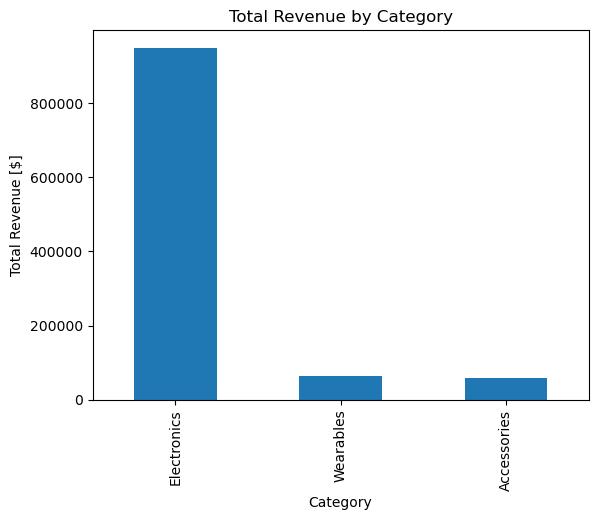

In [4]:
# Group by Category
#  Total Revenue
df_copy.groupby("Category")["Total Price Calc"].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Total Revenue by Category")
plt.ylabel("Total Revenue [$]")
plt.show();

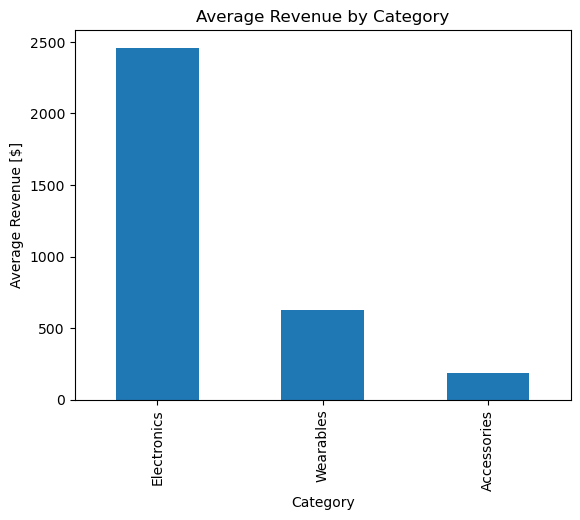

In [5]:
# Average revenue by Category
df_copy.groupby("Category")["Total Price Calc"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Average Revenue by Category")
plt.ylabel("Average Revenue [$]")
plt.show();

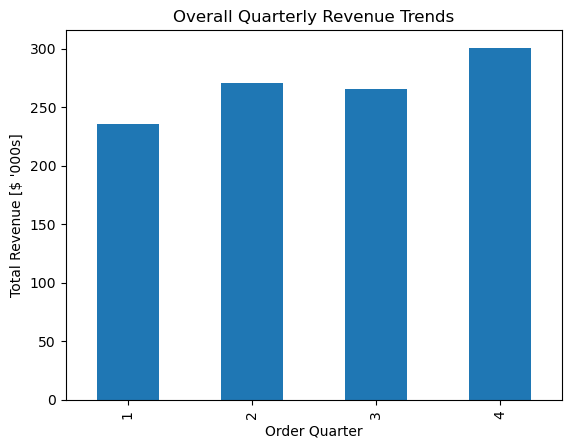

In [30]:
(df_copy.groupby(by="Order Quarter")["Total Price Calc"].sum() / 1e3).plot(kind="bar")
plt.title("Overall Quarterly Revenue Trends")
plt.ylabel("Total Revenue [$ '000s]")
plt.show();

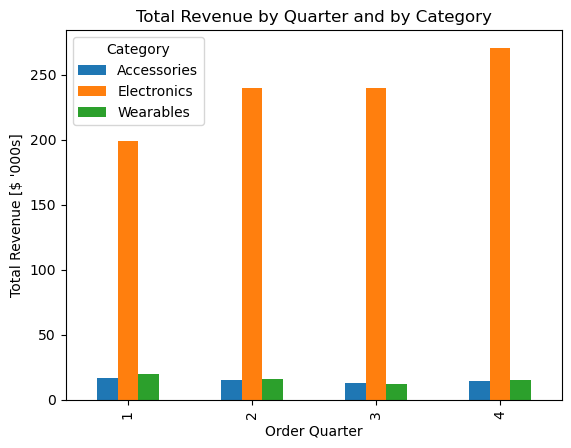

In [33]:
(df_copy.groupby(by=["Order Quarter", "Category"])["Total Price Calc"].sum() / 1e3).unstack().plot(kind="bar")
plt.title("Total Revenue by Quarter and by Category")
plt.ylabel("Total Revenue [$ '000s]")
plt.show();

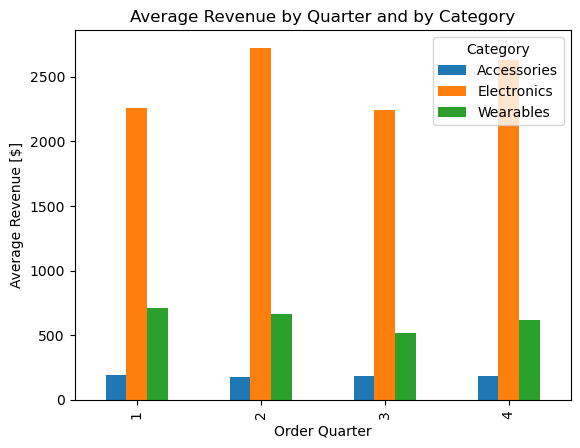

In [35]:
# Quarterly Revenue Trends by Category
df_copy.groupby(by=["Order Quarter", "Category"])["Total Price Calc"].mean().unstack().plot(kind="bar")
plt.title("Average Revenue by Quarter and by Category")
plt.ylabel("Average Revenue [$]")
plt.show();

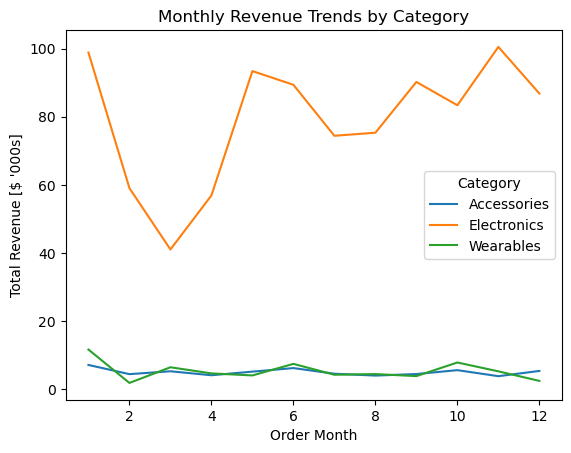

In [5]:
# Monthly Trends Revenue Trends by Category
(df_copy.groupby(by=["Order Month", "Category"])["Total Price Calc"].sum() / 1e3).unstack().plot(kind="line")
plt.title("Monthly Revenue Trends by Category")
plt.ylabel("Total Revenue [$ '000s]")
plt.show();

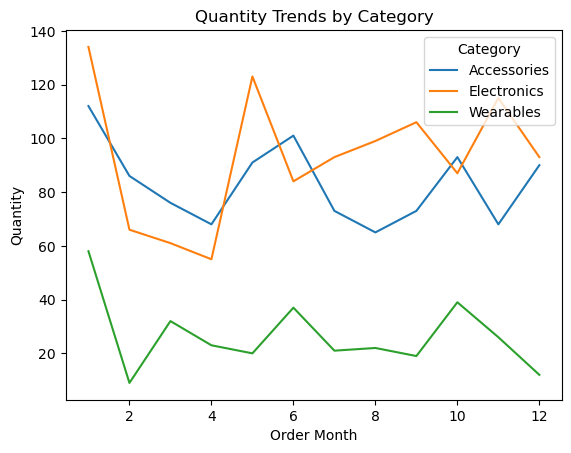

In [45]:
# Monthly Trends Revenue Trends by Category
(df_copy.groupby(by=["Order Month", "Category"])["Quantity"].sum()).unstack().plot(kind="line")
plt.title("Quantity Trends by Category")
plt.ylabel("Quantity")
plt.show();

### Product Revenue Trends

Let's explore all the products first and then do a breakdown for each category.

<Axes: xlabel='Order Month'>

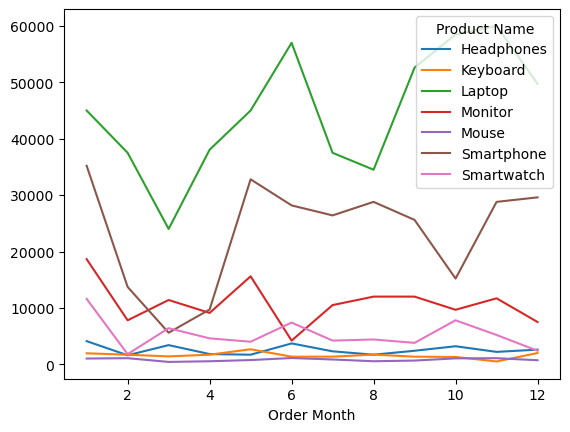

In [ ]:
# All Products Revenue Trends
df_copy.groupby(by=["Order Month", "Product Name"])["Total Price Calc"].sum().unstack().plot()

<Axes: xlabel='Order Month'>

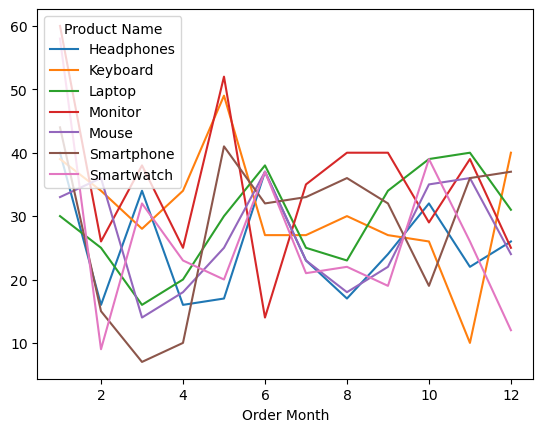

In [12]:
# All Products Quantity Trends
df_copy.groupby(by=["Order Month", "Product Name"])["Quantity"].sum().unstack().plot()

#### Electronics

In [ ]:
# Extract Electronics only
mask_category = df_copy["Category"] == "Electronics"
df_electronics = df_copy[mask_category]

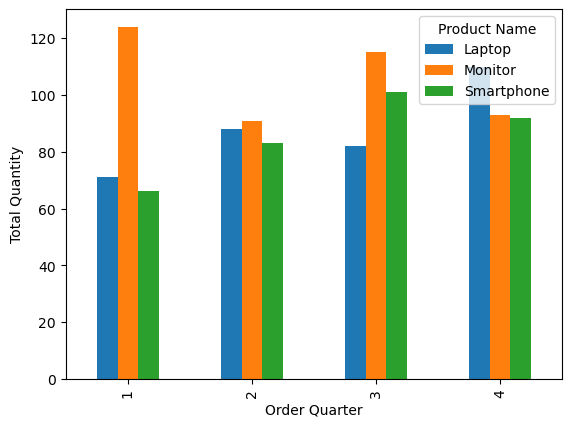

In [53]:
# Total Number of each Electronic Product bought quarterly
df_electronics.groupby(by=["Order Quarter","Product Name"])["Quantity"].sum().unstack().plot(kind="bar")
plt.ylabel("Total Quantity")
plt.show();

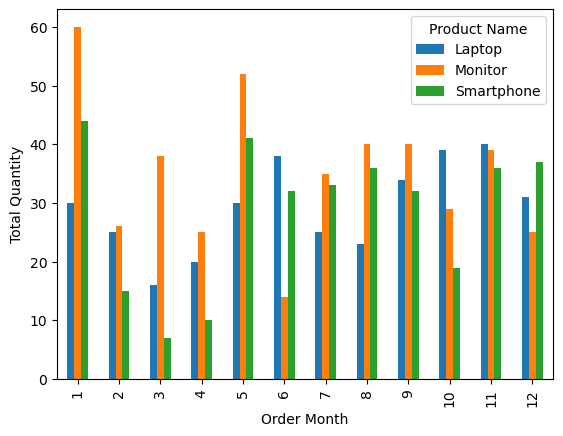

In [54]:
# Total Number of each Electronic Product bought monthly
df_electronics.groupby(by=["Order Month","Product Name"])["Quantity"].sum().unstack().plot(kind="bar")
plt.ylabel("Total Quantity")
plt.show();

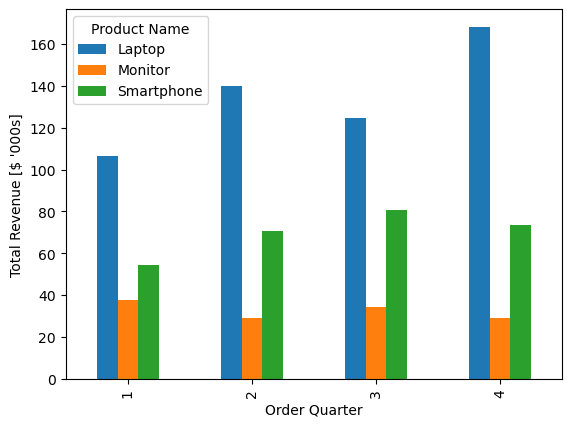

In [56]:
# Quarterly Revenue for each Electronic Product
(df_electronics.groupby(by=["Order Quarter", "Product Name"])["Total Price Calc"].sum().unstack() / 1e3).plot(kind="bar")
plt.ylabel("Total Revenue [$ '000s]")
plt.show();

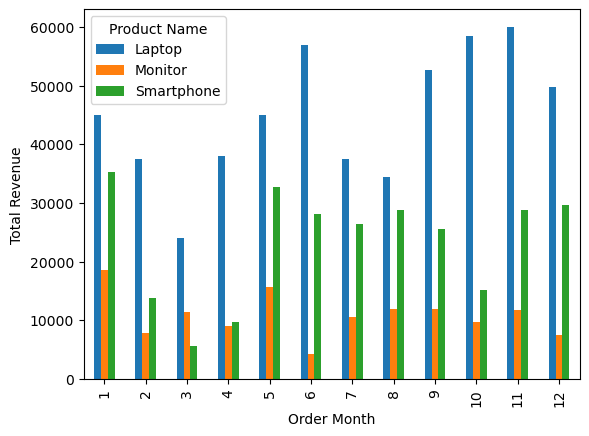

In [42]:
# Monthly Revenue Trends for Electronics
df_electronics.groupby(by=["Order Month", "Product Name"])["Total Price Calc"].sum().unstack().plot(kind="bar")
plt.ylabel("Total Revenue")
plt.show();

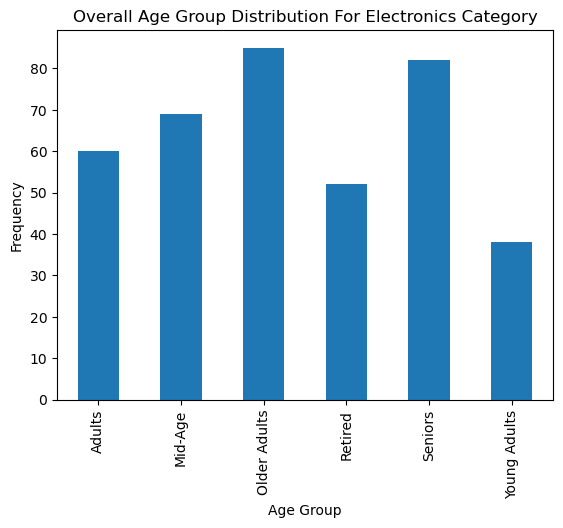

In [68]:
# Age Group Distribution
df_electronics.groupby("Age Group").size().plot(kind="bar")
plt.title("Overall Age Group Distribution For Electronics Category")
plt.ylabel("Frequency")
plt.show();

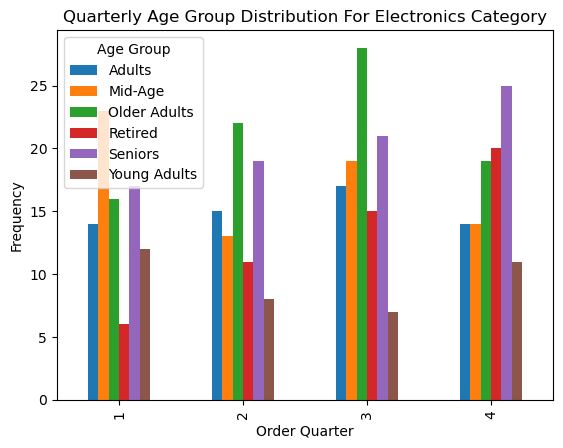

In [75]:
# Electronics Age Group Quarterly Distribution
df_electronics.groupby(by=["Order Quarter", "Age Group"]).size().unstack().plot(kind="bar")
plt.title("Quarterly Age Group Distribution For Electronics Category")
plt.ylabel("Frequency")
plt.show();

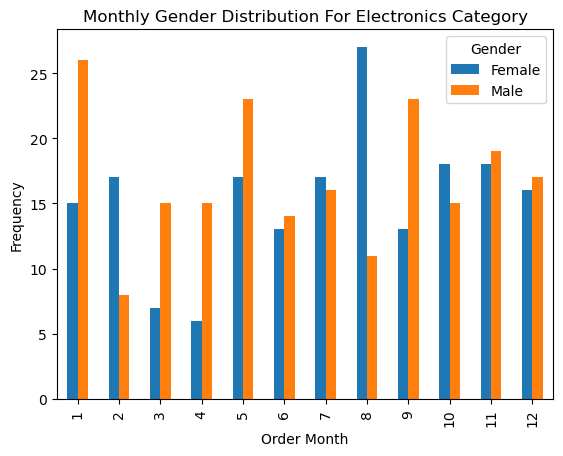

In [76]:
# Monthly Gender Distribution
df_electronics.groupby(by=["Order Month", "Gender"]).size().unstack().plot(kind="bar")
plt.title("Monthly Gender Distribution For Electronics Category")
plt.ylabel("Frequency")
plt.show();

#### Accessories

In [90]:
# Extract Accessories only
mask_category = df_copy["Category"] == "Accessories"
df_accessories = df_copy[mask_category]

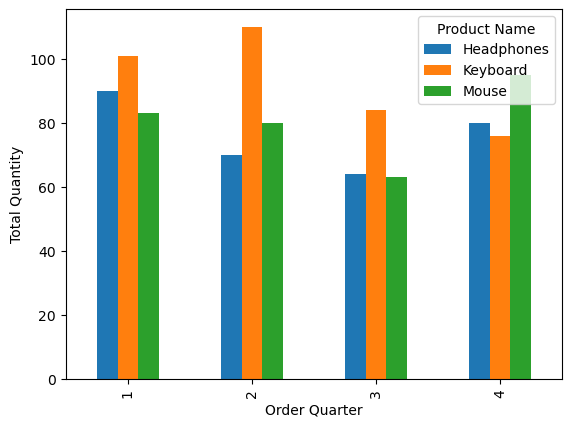

In [91]:
# Total Number of each Accessories bought quarterly
df_accessories.groupby(by=["Order Quarter","Product Name"])["Quantity"].sum().unstack().plot(kind="bar")
plt.ylabel("Total Quantity")
plt.show();

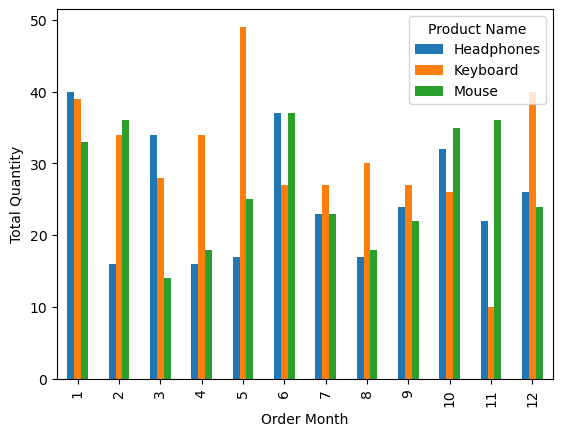

In [80]:
# Accessories purchased monthly
df_accessories.groupby(by=["Order Month","Product Name"])["Quantity"].sum().unstack().plot(kind="bar")
plt.ylabel("Total Quantity")
plt.show();

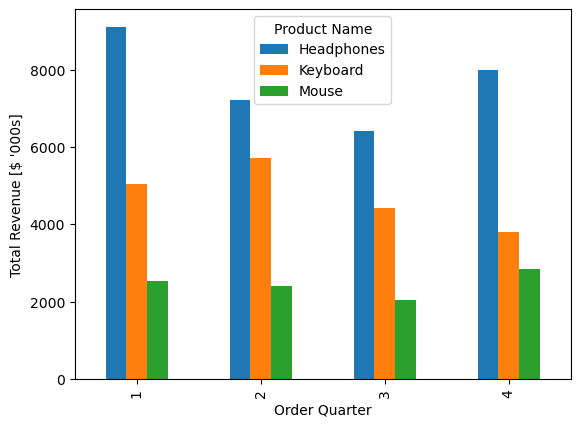

In [83]:
# Quarterly Revenue for each Accessories
df_accessories.groupby(by=["Order Quarter", "Product Name"])["Total Price Calc"].sum().unstack().plot(kind="bar")
plt.ylabel("Total Revenue [$ '000s]")
plt.show();

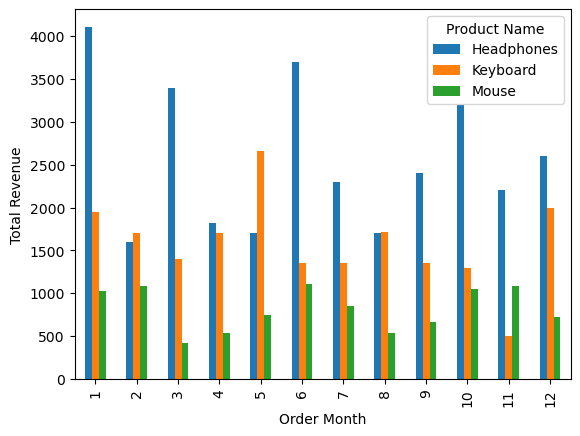

In [84]:
# Monthly Revenue Trends for Accessories
df_accessories.groupby(by=["Order Month", "Product Name"])["Total Price Calc"].sum().unstack().plot(kind="bar")
plt.ylabel("Total Revenue")
plt.show();

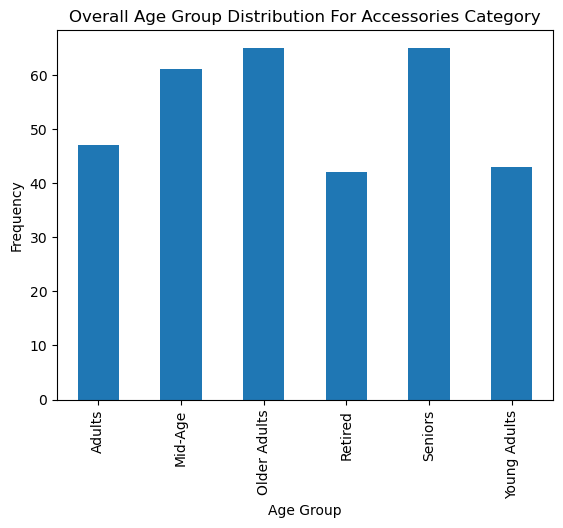

In [87]:
# Age Group Distribution
df_accessories.groupby("Age Group").size().plot(kind="bar")
plt.title("Overall Age Group Distribution For Accessories Category")
plt.ylabel("Frequency")
plt.show();

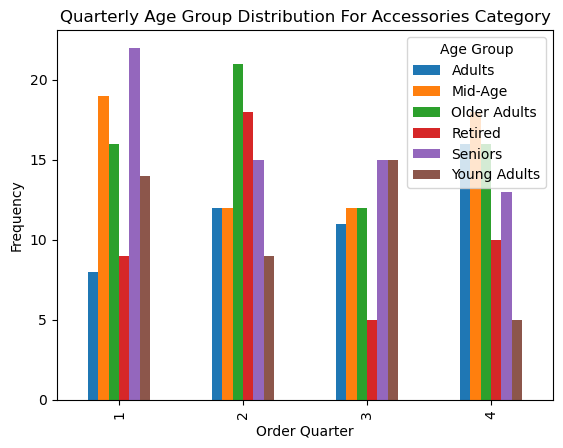

In [88]:
# Accessories Age Group Quarterly Distribution
df_accessories.groupby(by=["Order Quarter", "Age Group"]).size().unstack().plot(kind="bar")
plt.title("Quarterly Age Group Distribution For Accessories Category")
plt.ylabel("Frequency")
plt.show();

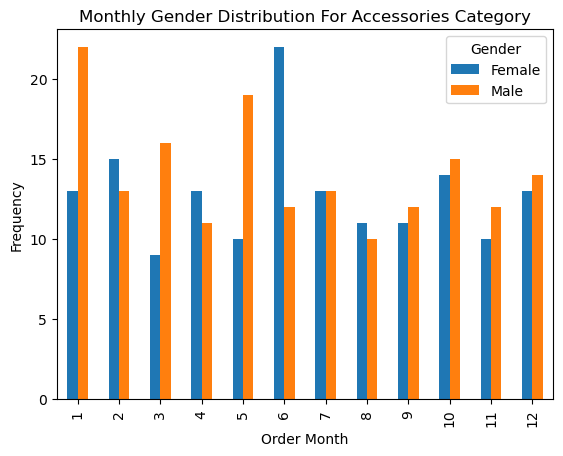

In [89]:
# Monthly Gender Distribution
df_accessories.groupby(by=["Order Month", "Gender"]).size().unstack().plot(kind="bar")
plt.title("Monthly Gender Distribution For Accessories Category")
plt.ylabel("Frequency")
plt.show();

#### Wearables

In [92]:
# Extract Wearables only
mask_category = df_copy["Category"] == "Wearables"
df_wearables = df_copy[mask_category]

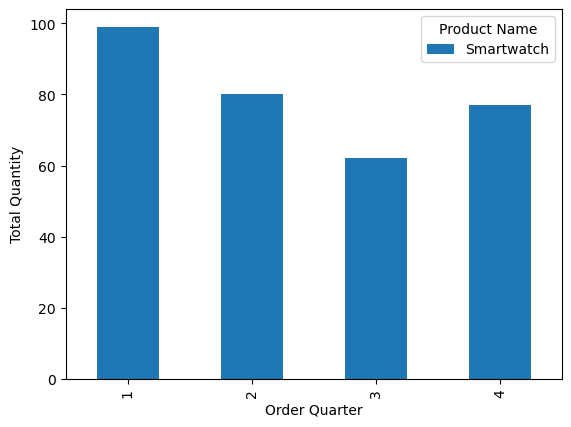

In [94]:
# Wearables bought quarterly
df_wearables.groupby(by=["Order Quarter","Product Name"])["Quantity"].sum().unstack().plot(kind="bar")
plt.ylabel("Total Quantity")
plt.show();

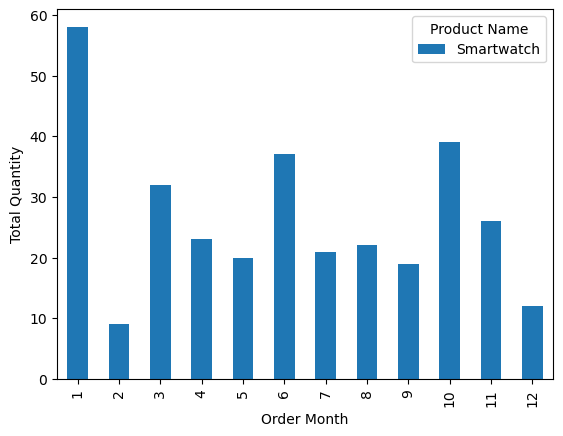

In [95]:
# Accessories purchased monthly
df_wearables.groupby(by=["Order Month","Product Name"])["Quantity"].sum().unstack().plot(kind="bar")
plt.ylabel("Total Quantity")
plt.show();

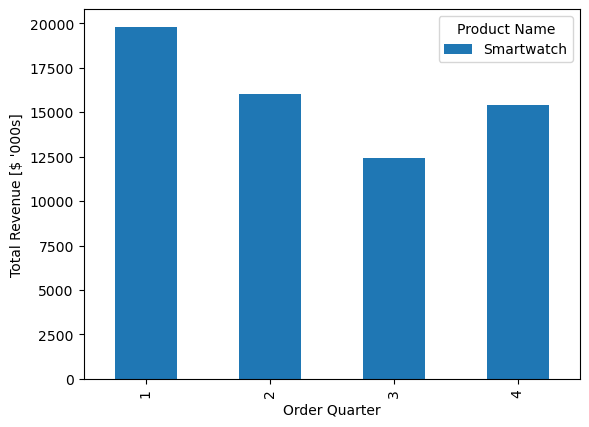

In [97]:
# Quarterly Revenue for Wearables
(df_wearables.groupby(by=["Order Quarter", "Product Name"])["Total Price Calc"].sum().unstack()).plot(kind="bar")
plt.ylabel("Total Revenue [$ '000s]")
plt.show();

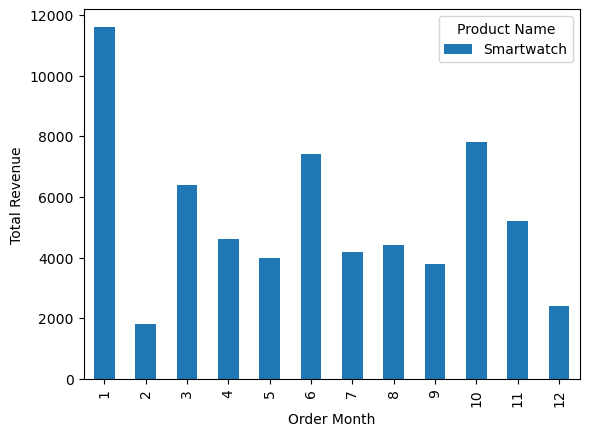

In [98]:
# Monthly Revenue Trends for Wearables
df_wearables.groupby(by=["Order Month", "Product Name"])["Total Price Calc"].sum().unstack().plot(kind="bar")
plt.ylabel("Total Revenue")
plt.show();

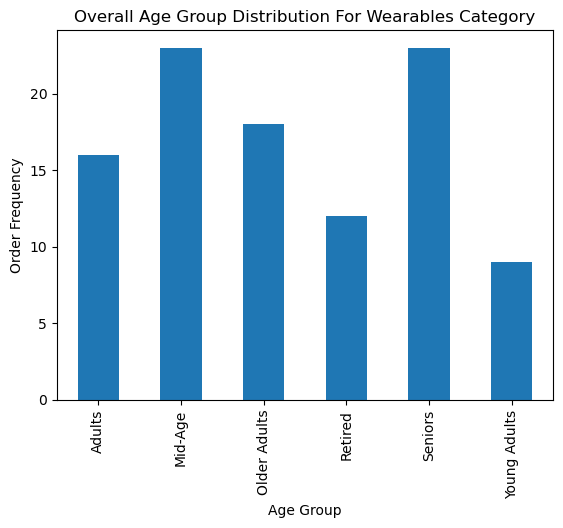

In [100]:
# Age Group Distribution
df_wearables.groupby("Age Group").size().plot(kind="bar")
plt.title("Overall Age Group Distribution For Wearables Category")
plt.ylabel("Order Frequency")
plt.show();

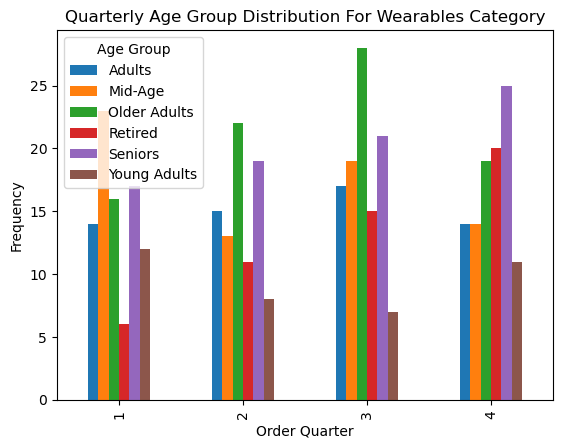

In [101]:
# Electronics Age Group Quarterly Distribution
df_electronics.groupby(by=["Order Quarter", "Age Group"]).size().unstack().plot(kind="bar")
plt.title("Quarterly Age Group Distribution For Wearables Category")
plt.ylabel("Frequency")
plt.show();

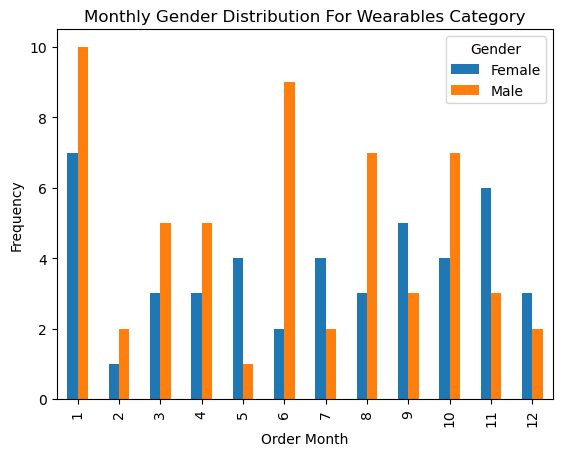

In [102]:
# Monthly Gender Distribution
df_wearables.groupby(by=["Order Month", "Gender"]).size().unstack().plot(kind="bar")
plt.title("Monthly Gender Distribution For Wearables Category")
plt.ylabel("Frequency")
plt.show();

### Products and Shipping Status

In [105]:
df_copy.groupby("Shipping Status").size()

Shipping Status
Delivered     268
In Transit    284
Returned      258
dtype: int64

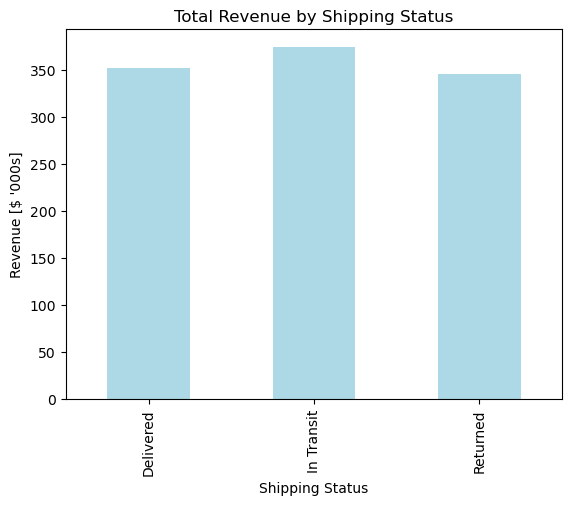

In [ ]:
# Total Revenue by Shipping Status
(df_copy.groupby("Shipping Status")["Total Price Calc"].sum() / 1e3).plot(kind="bar", color="lightblue")
plt.title("Total Revenue by Shipping Status")
plt.ylabel("Revenue [$ '000s]")
plt.show();

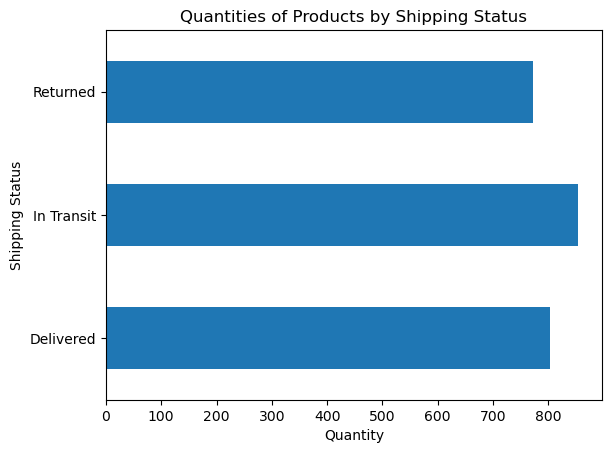

In [119]:
# Shipping Status Raw
df_copy.groupby("Shipping Status")["Quantity"].sum().plot(kind="barh")
plt.title("Quantities of Products by Shipping Status")
plt.xlabel("Quantity")
plt.show();

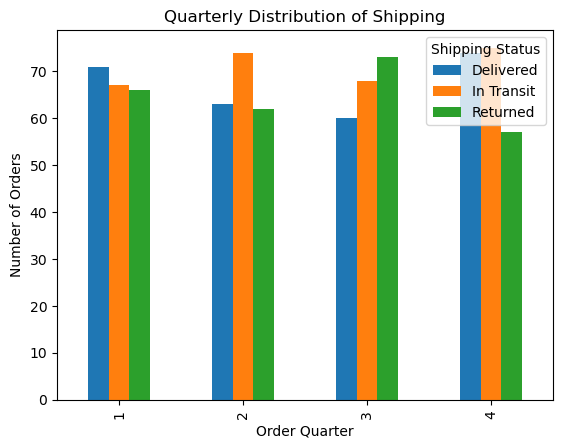

In [126]:
# Quarterly Distribution of Shipping
df_copy.groupby(by=["Order Quarter", "Shipping Status"]).size().unstack().plot(kind="bar")
plt.title("Quarterly Distribution of Shipping")
plt.ylabel("Number of Orders")
plt.show();

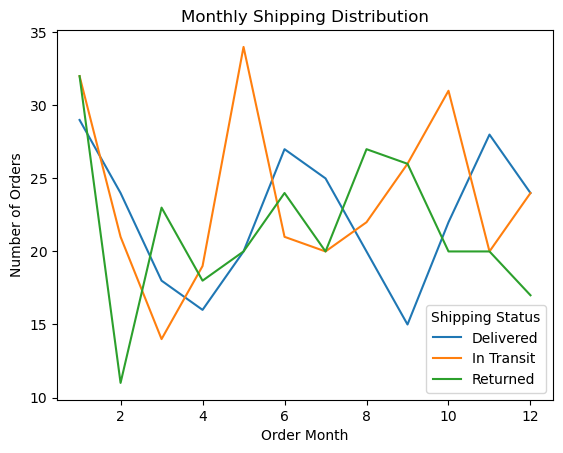

In [187]:
# Monthly Shipping Trends
df_copy.groupby(by=["Order Month", "Shipping Status"]).size().unstack().plot(kind="line")
plt.title("Monthly Shipping Distribution")
plt.ylabel("Number of Orders")
plt.show();

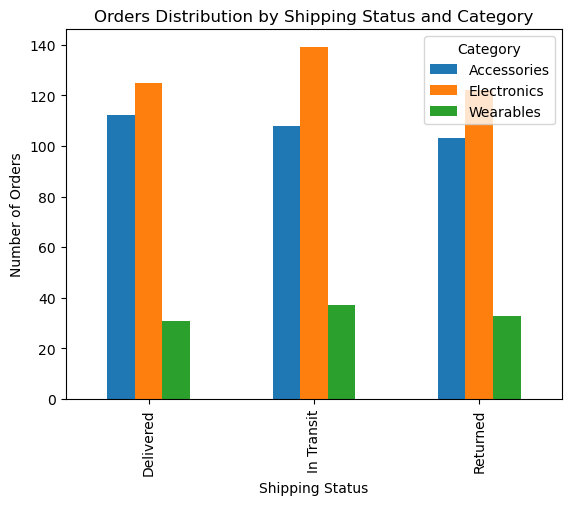

In [123]:
# Deep dive to explore shipping status by distribution
df_copy.groupby(by=["Shipping Status", "Category"]).size().unstack().plot(kind="bar")
plt.title("Orders Distribution by Shipping Status and Category")
plt.ylabel("Number of Orders")
plt.show();

In [ ]:
# Shipping status by Unit prices

In [184]:
# Orders with high totals
mask_high_total = df_copy["Total Price Calc"] >= 3e3
high_total_orders = df_copy[mask_high_total]

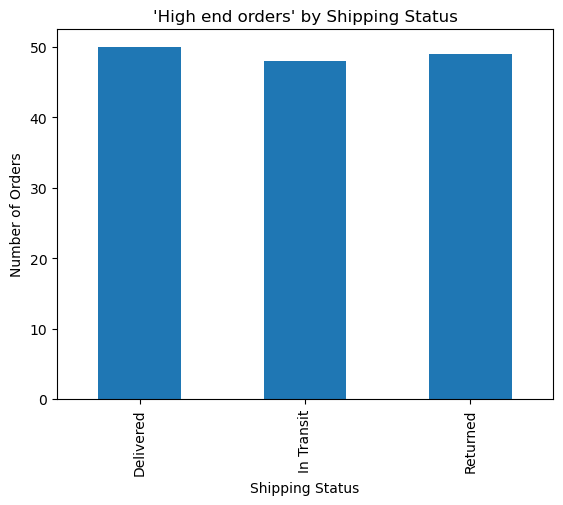

In [185]:
# Shipping distribution
high_total_orders.groupby("Shipping Status").size().plot(kind="bar")
plt.title("'High end orders' by Shipping Status")
plt.ylabel("Number of Orders");
plt.show();

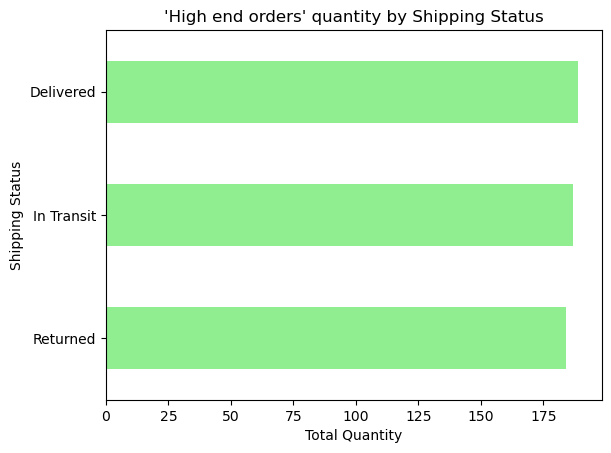

In [192]:
# Total quantities distribution of high end orders
high_total_orders.groupby("Shipping Status")["Quantity"].sum().sort_values().plot(kind="barh", color="lightgreen")
plt.title("'High end orders' quantity by Shipping Status")
plt.xlabel("Total Quantity");
plt.show();

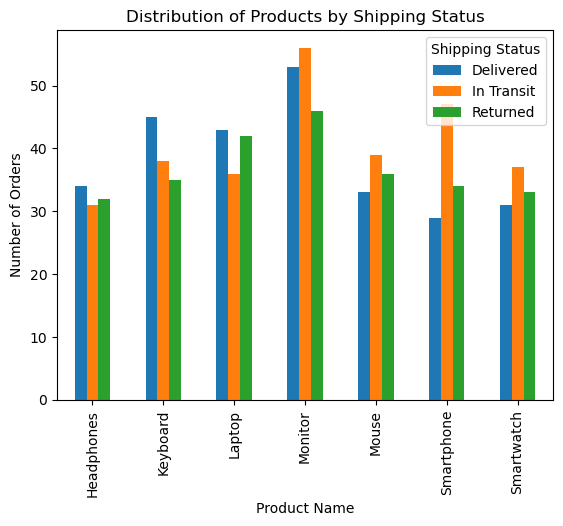

In [197]:
df_copy.groupby(by=["Product Name", "Shipping Status"]).size().unstack().plot(kind="bar")
plt.title("Distribution of Products by Shipping Status")
plt.ylabel("Number of Orders")
plt.show();

### Products and Shipping Fees

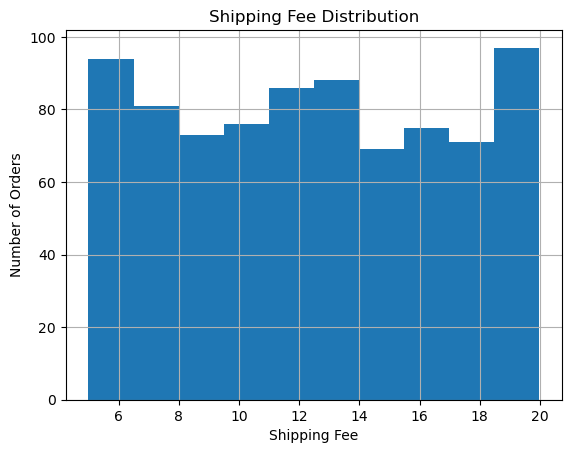

In [208]:
# Shipping Fees Distribution
df_copy["Shipping Fee"].hist(bins=10)
plt.title("Shipping Fee Distribution")
plt.ylabel("Number of Orders")
plt.xlabel("Shipping Fee")
plt.show();

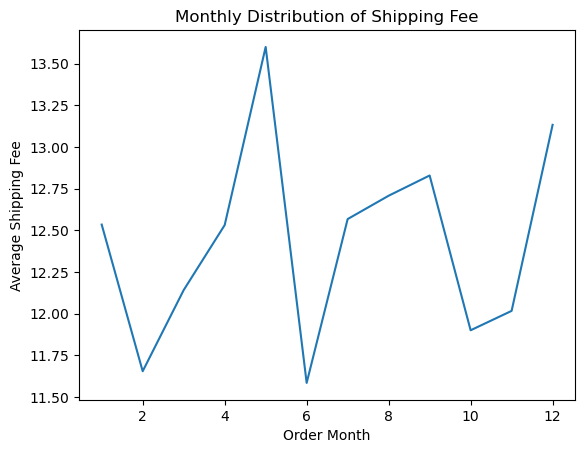

In [ ]:
# Monthly Distribution of Average Shipping Fee
df_copy.groupby("Order Month")["Shipping Fee"].mean().plot(kind="line")
plt.title("Total Monthly Distribution of Shipping Fee")
plt.ylabel("Average Shipping Fee")
plt.show();

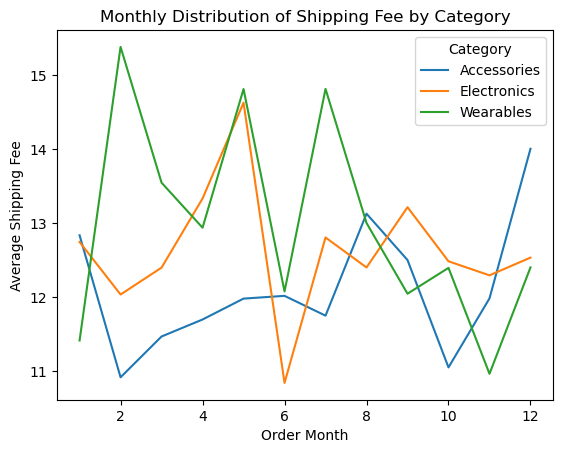

In [222]:
# Regional Shipping Fee Distribution
df_copy.groupby(by=["Order Month", "Category"])["Shipping Fee"].mean().unstack().plot(kind="line")
plt.title("Monthly Distribution of Shipping Fee by Category")
plt.ylabel("Average Shipping Fee")
plt.show();

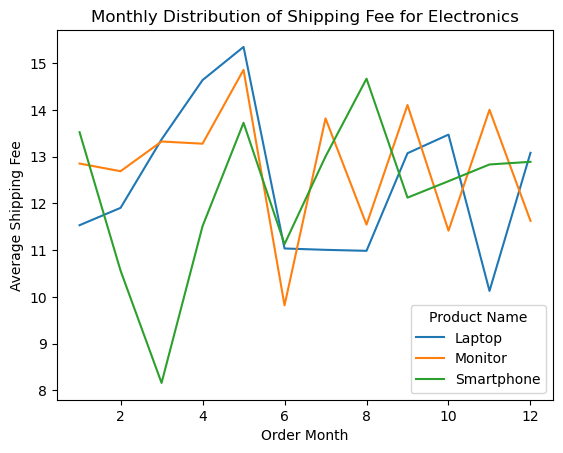

In [227]:
df_electronics.groupby(by=["Order Month", "Product Name"])["Shipping Fee"].mean().unstack().plot(kind="line")
plt.title("Monthly Distribution of Shipping Fee for Electronics")
plt.ylabel("Average Shipping Fee")
plt.show();

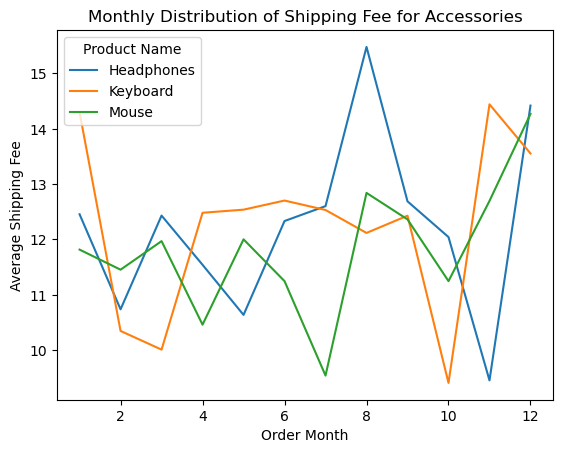

In [225]:
df_accessories.groupby(by=["Order Month", "Product Name"])["Shipping Fee"].mean().unstack().plot(kind="line")
plt.title("Monthly Distribution of Shipping Fee for Accessories")
plt.ylabel("Average Shipping Fee")
plt.show();

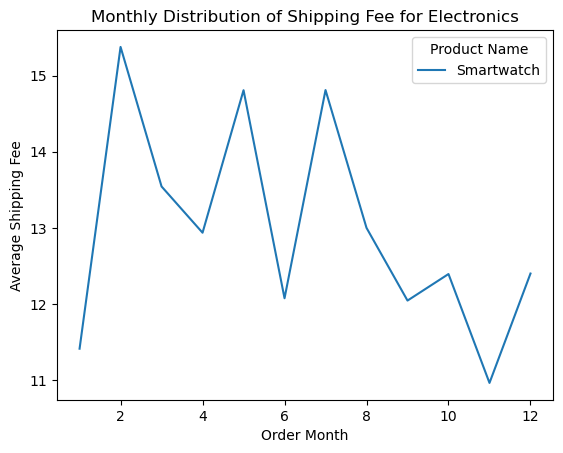

In [226]:
df_wearables.groupby(by=["Order Month", "Product Name"])["Shipping Fee"].mean().unstack().plot(kind="line")
plt.title("Monthly Distribution of Shipping Fee for Electronics")
plt.ylabel("Average Shipping Fee")
plt.show();

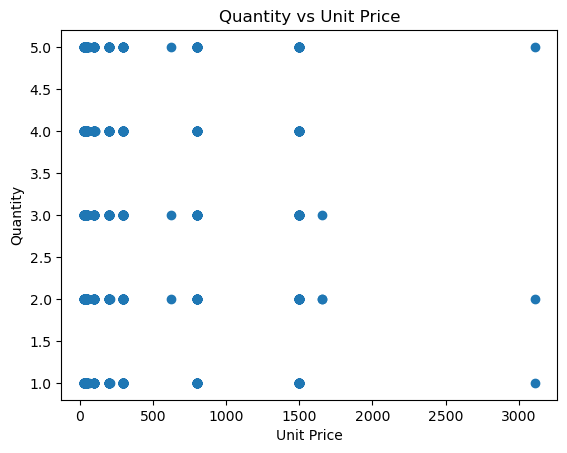

In [232]:
# Pricing and Quantity Ordered
plt.scatter(x=df["Unit Price"], y=df["Quantity"])
plt.title("Quantity vs Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.show();

### Regional Trends For Products and Categories

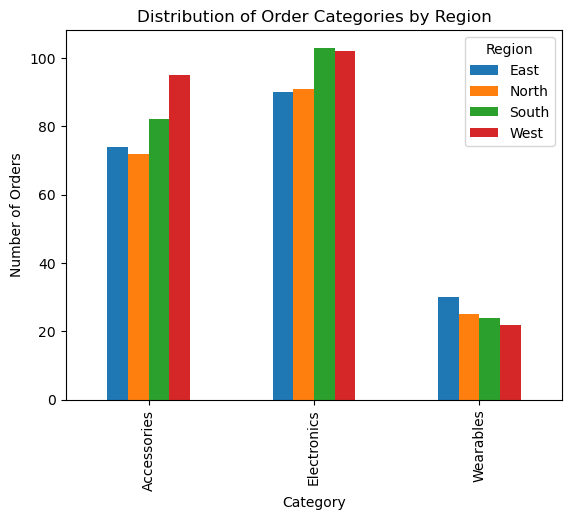

In [238]:
df_copy.groupby(by=["Category", "Region"]).size().unstack().plot(kind="bar")
plt.ylabel("Number of Orders")
plt.title("Distribution of Order Categories by Region")
plt.show();

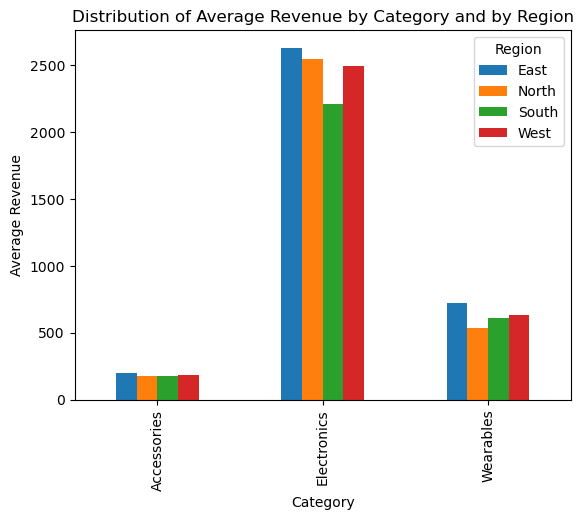

In [248]:
df_copy.groupby(by=["Category", "Region"])["Total Price Calc"].mean().sort_values().unstack().plot(kind="bar")
plt.title("Distribution of Average Revenue by Category and by Region")
plt.ylabel("Average Revenue")
plt.show();

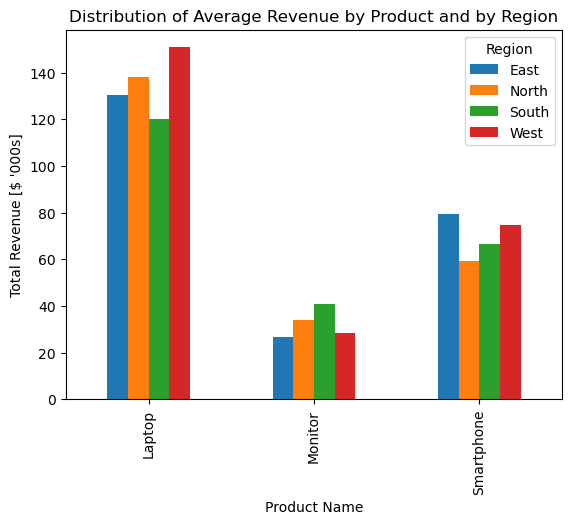

In [ ]:
# Electrionics Distribuiton
(df_electronics.groupby(by=["Product Name", "Region"])["Total Price Calc"].sum().sort_values() / 1e3).unstack().plot(kind="bar")
plt.title("Distribution of Average Revenue by Product and by Region")
plt.ylabel("Total Revenue [$ '000s]")
plt.show();

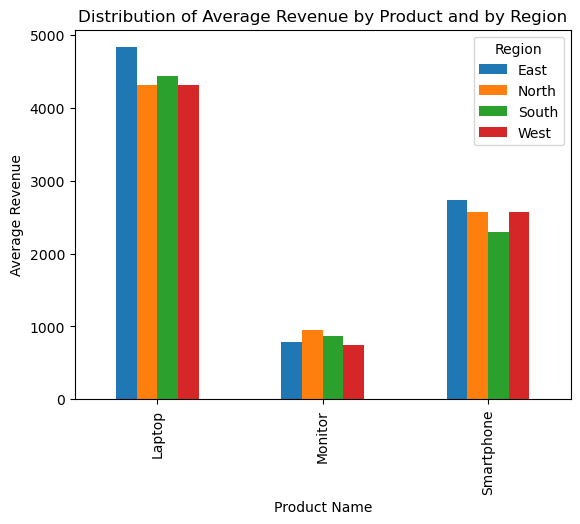

In [249]:
df_electronics.groupby(by=["Product Name", "Region"])["Total Price Calc"].mean().sort_values().unstack().plot(kind="bar")
plt.title("Distribution of Average Revenue by Product and by Region")
plt.ylabel("Average Revenue")
plt.show();

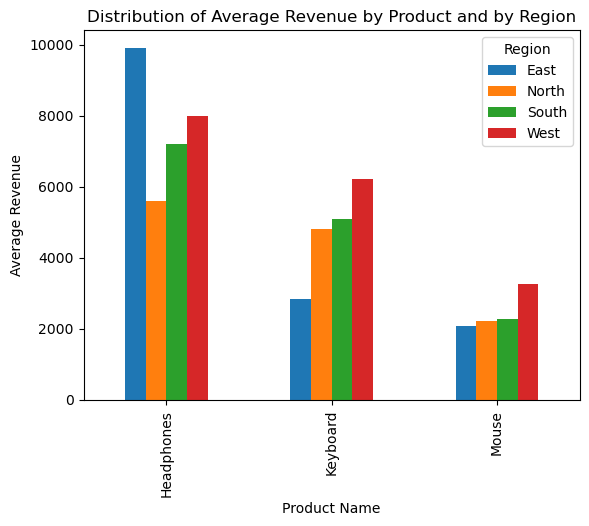

In [ ]:
# Accessories Distribuiton
df_accessories.groupby(by=["Product Name", "Region"])["Total Price Calc"].sum().sort_values().unstack().plot(kind="bar")
plt.title("Distribution of Average Revenue by Product and by Region")
plt.ylabel("Total Revenue")
plt.show();

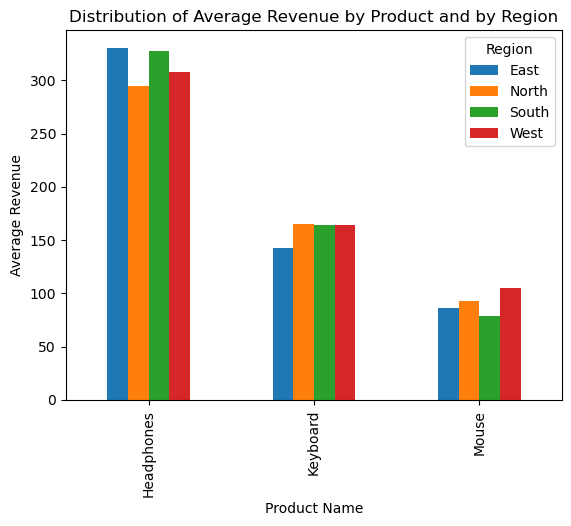

In [ ]:
# Accessories Distribuiton
df_accessories.groupby(by=["Product Name", "Region"])["Total Price Calc"].mean().sort_values().unstack().plot(kind="bar")
plt.title("Distribution of Average Revenue by Product and by Region")
plt.ylabel("Average Revenue")
plt.show();

## 📌Summary of Insights

## 📝 Usage Information

This notebook is open for educational and non-commercial use.
Feel free to reuse, modify, or reference this work as part of your learning or projects.